In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from bs4 import BeautifulSoup
import numpy as np

In [124]:
url = 'https://github.com/SofiyaLyn/Thesis/raw/main/true_data.csv'
data = pd.read_csv(url)
data.head()

,Year,Country,"Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)",IPO_market_share,New_Business,IPOs_Number_of_Issues,P/E_Ratio,E/P_ratio,Stock_Market_Index,Interest_rate_up_to_1_mln,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,2009,Hungary,0.00,0.00,42046,1,15.2913,0.07,"21,227.01",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Hungary,179.37,64.03,"44,269.00",4,12.1724,0.08,"21,327.07",9.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,Hungary,0.00,0.00,"52,217.00",1,10.8504,0.09,"16,974.24",9.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,Hungary,2.93,1.05,"32,311.00",1,12.6385,0.08,"18,173.20",10.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,Hungary,1.97,0.70,"28,207.00",1,10.6615,0.09,"18,564.08",8.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
print(data.columns)

Index(['Year', 'Country', 'Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)',
       'IPO_market_share', 'New_Business', 'IPOs_Number_of_Issues',
       'P/E_Ratio', 'E/P_ratio', 'Stock_Market_Index',
       'Interest_rate_up_to_1_mln', 'Interest_rate_over_€1M',
       'Aver_interest_rate_to_nonfinance', 'Real_GDP_Growth_(%)',
       'Nominal_GDP_($B)', 'Population_(M)', 'Population_Growth_(%)',
       'GDP_Per_Capita_($)', 'Real_Private_Consumption_Growth_(%)',
       'Real_Government_Consumption_Growth_(%)',
       'Real_Gross_Fixed_Investment_Growth_(%)',
       'Real_Gross_Fixed_Investment,_LCU_(BGNB)',
       'Industrial_Production_Growth_(%)', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35'],
      dtype='object')


In [126]:
data.drop(['Unnamed: 22'], axis=1, inplace=True)
data.drop(['Unnamed: 23'], axis=1, inplace=True)
data.drop(['Unnamed: 24'], axis=1, inplace=True)
data.drop(['Unnamed: 25'], axis=1, inplace=True)
data.drop(['Unnamed: 26'], axis=1, inplace=True)
data.drop(['Unnamed: 27'], axis=1, inplace=True)
data.drop(['Unnamed: 28'], axis=1, inplace=True)
data.drop(['Unnamed: 29'], axis=1, inplace=True)
data.drop(['Unnamed: 30'], axis=1, inplace=True)
data.drop(['Unnamed: 31'], axis=1, inplace=True)
data.drop(['Unnamed: 32'], axis=1, inplace=True)
data.drop(['Unnamed: 33'], axis=1, inplace=True)
data.drop(['Unnamed: 34'], axis=1, inplace=True)
data.drop(['Unnamed: 35'], axis=1, inplace=True)
data = data[data['Year'].isin([2023, 2024]) == False]

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 269
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Year                                                238 non-null    int64  
 1   Country                                             238 non-null    object 
 2   Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)  238 non-null    object 
 3   IPO_market_share                                    238 non-null    float64
 4   New_Business                                        238 non-null    object 
 5   IPOs_Number_of_Issues                               238 non-null    int64  
 6   P/E_Ratio                                           198 non-null    float64
 7   E/P_ratio                                           238 non-null    object 
 8   Stock_Market_Index                                  148 non-null    object 
 9   Inte

## Converting E/P_ratio to numeric
        ### Had important decimals

In [129]:
data['E/P_ratio'] = pd.to_numeric(data['E/P_ratio'], errors='coerce')
data['E/P_ratio'] = data['E/P_ratio'] * 100


In [130]:
# Convert non-numeric values to NaN
data['E/P_ratio'] = pd.to_numeric(data['E/P_ratio'], errors='coerce')

# Fill NaN values with a default value (like 0)
data['E/P_ratio'] = data['E/P_ratio'].fillna(0)

# Now convert the column to integer
data['E/P_ratio'] = data['E/P_ratio'].astype(int)

### Converting negatives in () to values with minus sign

In [131]:
def convert_negatives(val):
    if isinstance(val, str):
        if val.startswith('(') and val.endswith(')'):
            return -float(val[1:-1])
    return val

# assuming `data` is DataFrame and `columns` is a list of column names
columns = ['Real_GDP_Growth_(%)', 'Real_Private_Consumption_Growth_(%)', 'Real_Government_Consumption_Growth_(%)', 
            'Real_Gross_Fixed_Investment_Growth_(%)', 'Real_Gross_Fixed_Investment,_LCU_(BGNB)', 'Industrial_Production_Growth_(%)']
data[columns] = data[columns].applymap(convert_negatives)

## Converting float data into int

In [132]:
# Columns to convert, identified based on likely content issues
cols_to_convert = ['Year',
    'Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)',
    'IPO_market_share', 'IPOs_Number_of_Issues', 'New_Business', 'P/E_Ratio', 'E/P_ratio',
    'Stock_Market_Index', 'Interest_rate_up_to_1_mln',
    'Interest_rate_over_€1M', 'Aver_interest_rate_to_nonfinance',
    'Real_GDP_Growth_(%)', 'Nominal_GDP_($B)', 'Population_(M)',
    'Population_Growth_(%)', 'GDP_Per_Capita_($)',
    'Real_Private_Consumption_Growth_(%)',
    'Real_Government_Consumption_Growth_(%)',
    'Real_Gross_Fixed_Investment_Growth_(%)',
    'Real_Gross_Fixed_Investment,_LCU_(BGNB)',
    'Industrial_Production_Growth_(%)'
]

import re
pattern = re.compile(r'[^\d.]+')  # Regex to remove any non-digit/non-decimal characters

for col in cols_to_convert:
    # Remove non-numeric characters (keep decimals for conversion)
    data[col] = data[col].replace(pattern, '', regex=True)

    # Convert to numeric, coerce errors to NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')

    # Optionally, handle NaN values based on your dataset's needs
    data[col] = data[col].fillna(0)

    # Convert to integer if necessary (consider keeping as float if data includes decimals)
    data[col] = data[col].astype(int)

# Check the data to ensure conversion worked as expected
print(data[cols_to_convert].head())

   Year  Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)  IPO_market_share  \
0  2009                                                  0                  0   
1  2010                                                179                 64   
2  2011                                                  0                  0   
3  2012                                                  2                  1   
4  2013                                                  1                  0   

   IPOs_Number_of_Issues  New_Business  P/E_Ratio  E/P_ratio  \
0                      1         42046         15        700   
1                      4         44269         12        800   
2                      1         52217         10        900   
3                      1         32311         12        800   
4                      1         28207         10        900   

   Stock_Market_Index  Interest_rate_up_to_1_mln  Interest_rate_over_€1M  ...  \
0               21227                          

In [133]:
data.to_csv('/Users/sonetalyn/Desktop/Thesis/cleaned_data.csv', index=False)

### Eigen values and VIF on interest rate, expecially in EU countries

In [134]:
# EIGENVALUES
cov_matrix = data[['Interest_rate_up_to_1_mln', 'Interest_rate_over_€1M' ]].cov()

eigenvalues = np.linalg.eigvals(cov_matrix.values)

print(eigenvalues)

#The test showed values of [22.79556464  1.14250514], there is no multicolinearity in the data set of interest rates is not identified,
# therefore was simplification I took the average of interest rates from 2009 until 2022

[23.44628376  1.22470869]


In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd
import numpy as np

# replace 'column1', 'column2', etc. with the names of your columns
selected_columns = data[['Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)',
       'IPO_market_share', 'IPOs_Number_of_Issues', 'New_Business',  'P/E_Ratio', 'E/P_ratio',
       'Stock_Market_Index', 'Interest_rate_up_to_1_mln',
       'Interest_rate_over_€1M', 'Aver_interest_rate_to_nonfinance',
       'Real_GDP_Growth_(%)', 'Nominal_GDP_($B)', 'Population_(M)',
       'Population_Growth_(%)', 'GDP_Per_Capita_($)',
       'Real_Private_Consumption_Growth_(%)',
       'Real_Government_Consumption_Growth_(%)',
       'Real_Gross_Fixed_Investment_Growth_(%)',
       'Real_Gross_Fixed_Investment,_LCU_(BGNB)',
       'Industrial_Production_Growth_(%)']]

X = selected_columns.values

vif_data = pd.DataFrame()
vif_data["feature"] = selected_columns.columns

# calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(len(selected_columns.columns))]

print(vif_data)

                                              feature        VIF
0   Proceeds_Amount_+_Over_Sold_This_Market_(USD,_...   7.102222
1                                    IPO_market_share   1.550345
2                               IPOs_Number_of_Issues   7.146481
3                                        New_Business   2.723025
4                                           P/E_Ratio   1.268934
5                                           E/P_ratio   1.336535
6                                  Stock_Market_Index   1.852140
7                           Interest_rate_up_to_1_mln  11.196157
8                              Interest_rate_over_€1M  10.048368
9                    Aver_interest_rate_to_nonfinance   6.977038
10                                Real_GDP_Growth_(%)   8.554044
11                                   Nominal_GDP_($B)  21.640335
12                                     Population_(M)  25.318809
13                              Population_Growth_(%)   1.695019
14                       

In [41]:
data['intervention'] = data['Year'] >= 2017
data['intervention'] = data['intervention'].astype(int)

In [42]:
data['treated'] = data['Country'].isin(["Hungary", "Poland", "Slovakia", "Czech Republic", "Slovenia", "Bulgaria", "Romania", "Estonia", "Latvia", "Lithuania"])
data['treated'] = data['treated'].astype(int)

data['treated_intervention'] = data['treated']*data['intervention']

In [47]:
X = data[['treated', 'intervention', 'treated_intervention']]
X = sm.add_constant(X)

y = data['Aver_interest_rate_to_nonfinance']

                                   OLS Regression Results                                   
Dep. Variable:     Aver_interest_rate_to_nonfinance   R-squared:                       0.207
Model:                                          OLS   Adj. R-squared:                  0.198
Method:                               Least Squares   F-statistic:                     23.35
Date:                              Thu, 09 May 2024   Prob (F-statistic):           1.85e-13
Time:                                      11:59:43   Log-Likelihood:                -756.71
No. Observations:                               272   AIC:                             1521.
Df Residuals:                                   268   BIC:                             1536.
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
                           coef    std err          t      P>|t|      

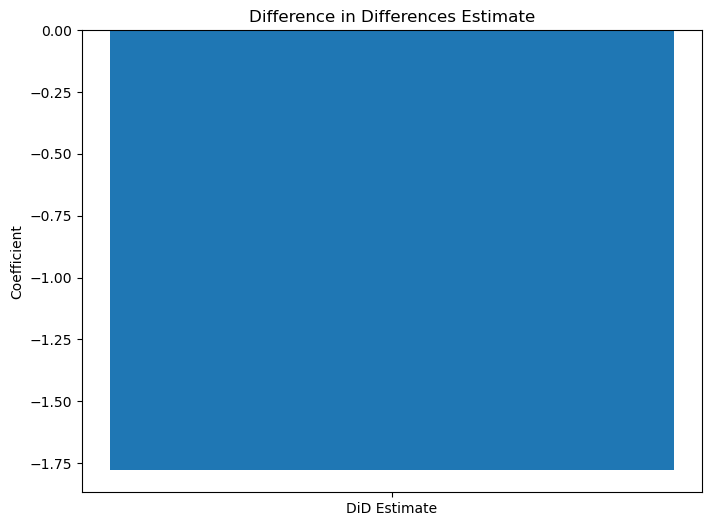

In [48]:
# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary
print(results.summary())

# Plot the coefficient of the interaction term
coef = results.params['treated_intervention']
plt.figure(figsize=(8, 6))
plt.bar(['DiD Estimate'], [coef])
plt.ylabel('Coefficient')
plt.title('Difference in Differences Estimate')
plt.show()

In [ ]:
plt.scatter(data['P/E Ratio'], data['E/P ratio'], 
c=data['treated_intervention'])
plt.xlabel('set of variables for your x')
plt.ylabel('set of variables for your y')
plt.title('Title of your plot')
plt.show()

In [46]:
X = data[['treated', 'intervention', 'treated_intervention']]
X = sm.add_constant(X)

y = data['Aver_interest_rate_to_nonfinance']

In [ ]:
'], 
c=data['treated_intervention'])
plt.xlabel('set of variables for your x')
plt.ylabel('set of variables for your y')
plt.title('Title of your plot')
plt.show()'], 
c=data['treated_intervention'])
plt.xlabel('set of variables for your x')
plt.ylabel('set of variables for your y')
plt.title('Title of your plot')
plt.show()

## Regression

In [ ]:
model_formulas = [
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + bargain1 + Inflation + WageGrowth",
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + bargain1 + Inflation + WageGrowth + lnminwage",
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + bargain1 + Inflation + WageGrowth + lnminwage + lnGDP + Gov_debt",
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + bargain1 + Inflation + WageGrowth + lnminwage + lnGDP + Gov_debt + ln_labor + Female_Workers + Parttime_employment + WomenUnemployment_rate",
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + bargain1 + Inflation + WageGrowth + lnminwage + lnGDP + Gov_debt + ln_labor + Female_Workers + Parttime_employment + WomenUnemployment_rate + Exports_growth + Imports_growth",
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + bargain1 + Inflation + WageGrowth + lnminwage + lnGDP + Gov_debt + ln_labor + Female_Workers + Parttime_employment + WomenUnemployment_rate + Exports_growth + Imports_growth + FDI_inflow + FDI_outflow + Tax_contribution"
]

In [ ]:
df['Year'] = df['Year'].astype(int)
df['Country'] = df['Country'].astype('category')
pdata = PanelData(df.set_index(['Country', 'Year']))

In [ ]:
from patsy import dmatrices
from statsmodels.regression.linear_model import OLS

def create_models(data, type, formulas):
    models = []
    for formula in formulas:
        if type == "OLS":
            y, X = dmatrices(formula, data=data, return_type='dataframe')
            model = OLS(y, X).fit().get_robustcov_results()
            models.append(model)
        elif type == "FE":
            model = PanelOLS.from_formula(formula, data=data, drop_absorbed=True).fit(cov_type='robust')
            models.append(model)
        elif type == "FD":
            model = FirstDifferenceOLS.from_formula(formula, data=data).fit(cov_type='robust')
            models.append(model)
        else:
            raise ValueError("Unknown model type")
    return models


In [ ]:
# Create OLS, FE, and FD models
ols_models = create_models(df, "OLS", model_formulas)
fe_models = create_models(pdata, "FE", model_formulas)
fd_models = create_models(pdata, "FD", model_formulas)

In [ ]:
for model in ols_models:
    print(model.summary())
for model in fe_models:
    print(model)
for model in fd_models:
    print(model)